Text(0.5, 1.0, 'learning rate=0.1, n_estimators=200')

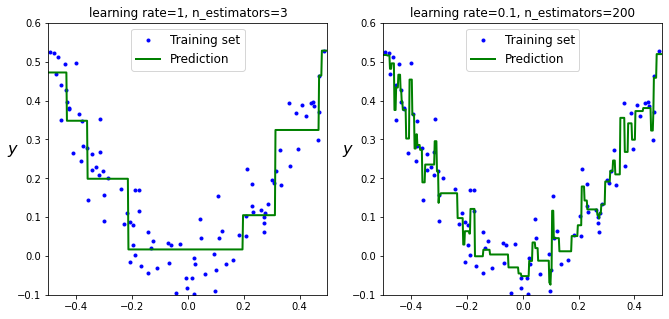

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 2*X[:, 0]**2 + 0.07 * np.random.randn(100)
gbr_clf = GradientBoostingRegressor(max_depth=2, n_estimators=3,   
                             learning_rate=1,
                             random_state =42)
gbr_clf.fit(X,y)

gbr_clf_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200,   
                             learning_rate=0.1,
                             random_state =42)
gbr_clf_slow.fit(X,y)


def plot_predictions(model, X, y, axes):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = model.predict(x1.reshape(-1, 1))
    plt.plot(X[:, 0], y, "b.", label="Training set")
    plt.plot(x1, y_pred, "g-", linewidth=2, label="Prediction")
    plt.legend(loc="upper center", fontsize=12)
    plt.axis(axes)


plt.figure(figsize=(11,5))

plt.subplot(121)
plot_predictions(gbr_clf, X, y, axes=[-0.5, 0.5, -0.1, 0.6])
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("learning rate=1, n_estimators=3", fontsize=12)


plt.subplot(122)
plot_predictions(gbr_clf_slow, X, y, axes=[-0.5, 0.5, -0.1, 0.6])
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("learning rate=0.1, n_estimators=200", fontsize=12)

Text(0.5, 1.0, 'Best Model - 27 trees')

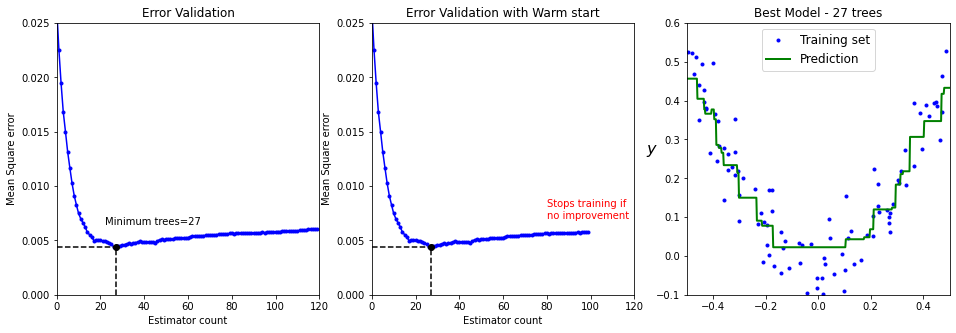

In [114]:
# Gradient Boosting with Early stopping
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def plot_validation_error(model,info=False):
  model.fit(X_train,y_train)
  mse_data = [mean_squared_error(predict,y_val) for predict in model.staged_predict(X_val)]
  min_error = np.min(mse_data)
  index = mse_data.index(min_error)
  plt.axis([0,120,0,0.025])
  plt.plot(mse_data,"b.-")
  plt.plot(index,min_error,"k.",markersize=12)
  plt.plot([index,index],[0,min_error],"k--")
  plt.plot([0,index],[min_error,min_error],"k--")
  plt.ylabel("Mean Square error")
  plt.xlabel("Estimator count")
  if info:
    plt.text(80,0.007,f"Stops training if \nno improvement",color="red")
    plt.title("Error Validation with Warm start")
  else :
    plt.text(index-5,min_error+0.002,f"Minimum trees={index}")
    plt.title("Error Validation")

estimators_count = 120
X_train, X_val, y_train, y_val = train_test_split(X, y,random_state=123)
gbrt_nowarm = GradientBoostingRegressor(max_depth=2, n_estimators=estimators_count, random_state=123)
gbrt_warm_st = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=123)

plt.figure(figsize=(16,5))
plt.subplot(131)
plot_validation_error(gbrt_nowarm)
plt.subplot(132)
plot_validation_error(gbrt_warm_st,info=True)


plt.subplot(133)
min_tree_model = GradientBoostingRegressor(max_depth=2, n_estimators=index,   
                             learning_rate=0.1,
                             random_state =123)
min_tree_model.fit(X,y)
plot_predictions(min_tree_model, X, y, axes=[-0.5, 0.5, -0.1, 0.6])
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title(f"Best Model - {index} trees")

In [106]:
# Understanding XGboost
import xgboost
xgb_model = xgboost.XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model1.predict(X_val)
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=2)
y_pred = xgb_reg.predict(X_val)